In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

In [6]:
# load the data from a local CSV file
data = pd.read_csv("C:/Users/user/Documents/GitHub/R5D5-Project/model/ML_Model_Dataset_04/complete_data_model_NBA_Player_Stats_Regular.csv")

In [7]:
data.head()

Rk  Age   G  GS    MP   FG   FGA    FG%   3P  3PA  ...  Pos_C  Pos_C-PF  \
0   2   28  76  75  26.3  2.8   5.1  0.547  0.0  0.0  ...      1         0   
1   3   24  56  56  32.6  7.3  13.0  0.557  0.0  0.1  ...      1         0   
2   5   36  47  12  22.3  5.4   9.7  0.550  0.3  1.0  ...      1         0   
3   6   23  65  21  22.6  3.9  10.5  0.372  1.6  5.2  ...      0         0   
4   6   23  50  19  26.3  4.7  12.6  0.375  1.9  6.1  ...      0         0   

   Pos_PF  Pos_PF-SF  Pos_PG  Pos_PG-SG  Pos_SF  Pos_SF-SG  Pos_SG  Pos_SG-SF  
0       0          0       0          0       0          0       0          0  
1       0          0       0          0       0          0       0          0  
2       0          0       0          0       0          0       0          0  
3       0          0       0          0       0          0       1          0  
4       0          0       0          0       0          0       1          0  

[5 rows x 38 columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rk         402 non-null    int64  
 1   Age        402 non-null    int64  
 2   G          402 non-null    int64  
 3   GS         402 non-null    int64  
 4   MP         402 non-null    float64
 5   FG         402 non-null    float64
 6   FGA        402 non-null    float64
 7   FG%        402 non-null    float64
 8   3P         402 non-null    float64
 9   3PA        402 non-null    float64
 10  3P%        402 non-null    float64
 11  2P         402 non-null    float64
 12  2PA        402 non-null    float64
 13  2P%        402 non-null    float64
 14  eFG%       402 non-null    float64
 15  FT         402 non-null    float64
 16  FTA        402 non-null    float64
 17  FT%        402 non-null    float64
 18  ORB        402 non-null    float64
 19  DRB        402 non-null    float64
 20  TRB       

In [9]:
# split the data into training and testing sets
X = data.drop('salary', axis=1)
y = data['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# create a Gradient Boosting Regressor model
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)


In [11]:
# train the model on the training set
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [12]:
# get the feature importance scores
feature_importance = gb.feature_importances_


In [13]:
# create a dictionary of feature importances
importances = dict(zip(X.columns, feature_importance))

# sort the dictionary by values in descending order
importances_sorted = {k: v for k, v in sorted(importances.items(), key=lambda item: item[1], reverse=True)}

# print the feature importances in descending order
print("Feature Importances (high to low):")
for feature, importance in importances_sorted.items():
    print(f"{feature}: {importance*100:.2f}%")


Feature Importances (high to low):
Age: 30.00%
2PA: 17.86%
2P: 5.18%
FT: 5.08%
BLK: 4.35%
AST: 4.35%
TRB: 4.13%
DRB: 3.57%
FGA: 2.40%
G: 2.00%
Rk: 2.00%
PTS: 1.95%
PF: 1.93%
ORB: 1.66%
3P%: 1.60%
GS: 1.47%
Pos_PF: 1.39%
2P%: 1.19%
TOV: 1.17%
MP: 1.09%
STL: 1.02%
FT%: 1.00%
3PA: 0.88%
FG: 0.66%
3P: 0.47%
eFG%: 0.44%
FG%: 0.43%
FTA: 0.38%
Pos_C-PF: 0.18%
Pos_PG: 0.10%
Pos_SG: 0.07%
Pos_C: 0.00%
Pos_SF: 0.00%
Pos_PF-SF: 0.00%
Pos_PG-SG: 0.00%
Pos_SF-SG: 0.00%
Pos_SG-SF: 0.00%


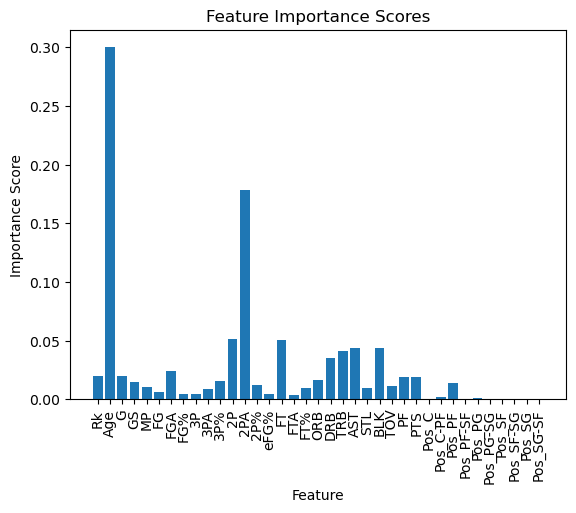

In [9]:
# plot the feature importances
plt.bar(range(X.shape[1]), feature_importance)
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores')
plt.show()